In [1]:
import numpy as np
import cv2
from pprint import pprint
import ffmpeg
import sys
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

from scipy.ndimage import gaussian_filter
from sklearn.cluster import KMeans

sys.path.append('../')

from precondition import cut_first_minute, play_sequence, show_frame
from detect_player import threshold_filter, filter_sequence, find_player_filter, get_player_coords
import importlib

In [2]:
filename = "/home/dmitry/work/open_source_stuff/blitz_DS/replay_videos/test_2.mp4"

In [3]:
seq = cut_first_minute(filename)

Battle start frame:  220


In [4]:
player_blob = filter_sequence(filter_sequence(seq, threshold_filter), find_player_filter)

In [5]:
coords = []
for i in range(player_blob.shape[-1]):
    coords.append(get_player_coords(player_blob[:,:,0,i]))
coords = np.array(coords)

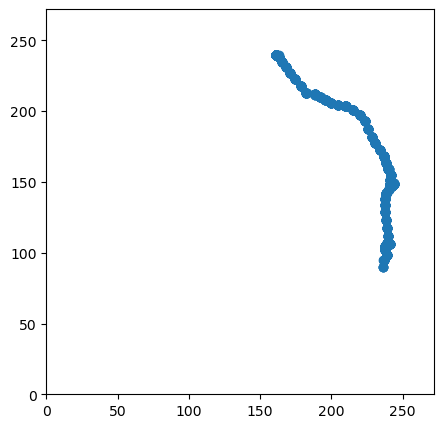

In [6]:
plt.figure(figsize = (5,5))
plt.scatter(coords[:,1], 272 - coords[:,0])
plt.xlim(0, 272)
plt.ylim(0, 272)
plt.show()